# Titanic Project

## Data Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 
The dataset contains 891 rows and 12 columns.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')



## Loading the dataset

In [2]:
df=pd.read_csv("Titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe() # Statistical summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape #Dimension of the dataset

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

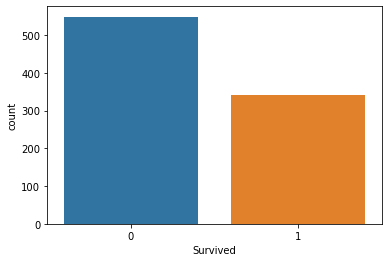

In [9]:
sns.countplot(df['Survived'])

#### From the value counts it is clear that the number of people who are not survived =549 and the number of people who survived=342.here '0' indicates not survived and '1' indicates survived.

#### In the countplot the blue colour bar represents people not survived and orange colour represents the number of people survived.

#### From the above value counts and plot, we can infer that the number of people who are not survived is greater than the number of survived people.

In [10]:
#Checking the null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is NaN values in the dataset

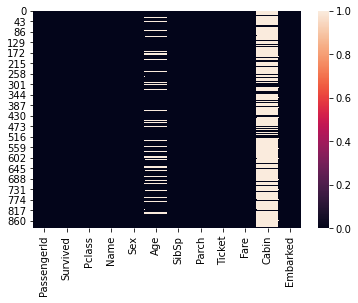

In [11]:
sns.heatmap(df.isnull())

#### From the above heatmap it is clear that there is more NaN values in columm 'Age'

In [12]:
df = df.drop('Cabin', axis=1) # dropping this column since there are many NaN values in this column and this column is not so important to predict the Target variable

## Data Visualization

### Univariate Analysis

In [13]:

def plotcountgraph(var):
    
    sns.set(font_scale=1.25)
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=var, hue='Survived', data=df,  palette="viridis")
    plt.setp(ax.get_xticklabels(), rotation=0)

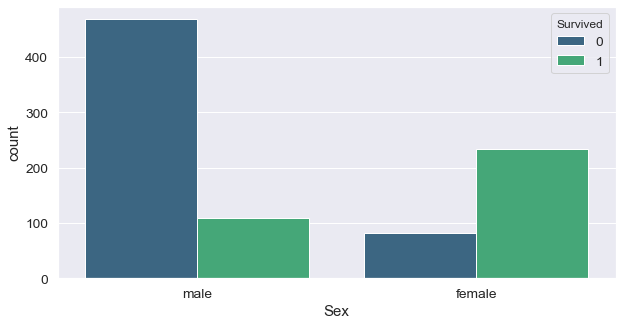

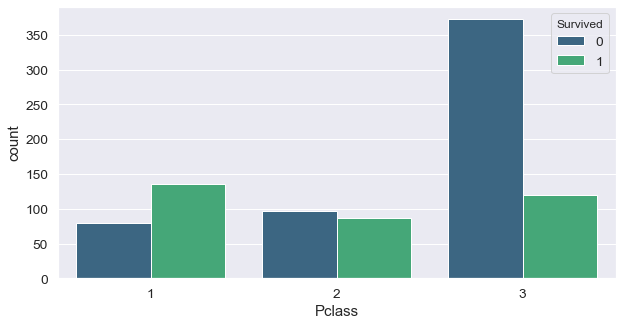

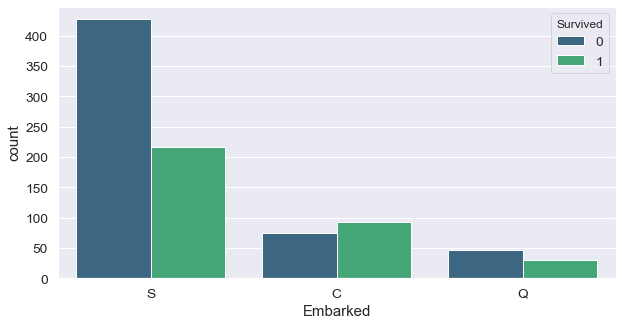

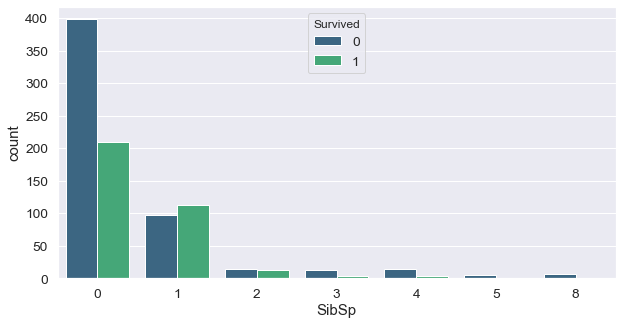

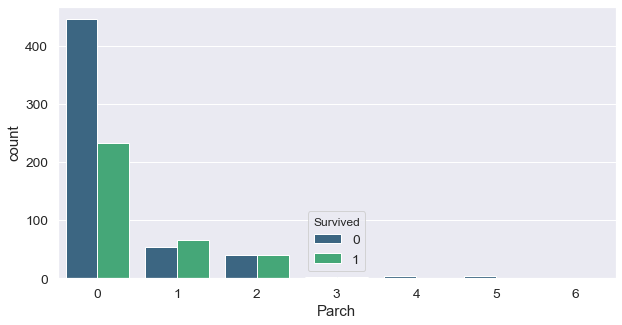

In [14]:
var=['Sex','Pclass','Embarked','SibSp','Parch']
for i in var:
    plotcountgraph(i)

### Conclusion from the above graphs

->Number of females survived is more when compared to male

->Lower the Pclass higher is the rate of survival

->Survival rate of people embarked from Southampton is higher

->Survival rate of people having no siblings is higher

->Survival rate of people having no parents or children aboard the Titanic is higher

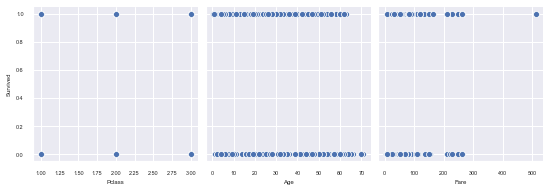

<Figure size 2160x720 with 0 Axes>

In [69]:
sns.pairplot(df,x_vars=['Pclass','Age','Fare'],y_vars='Survived')
plt.figure(figsize=[30,10])
plt.show()

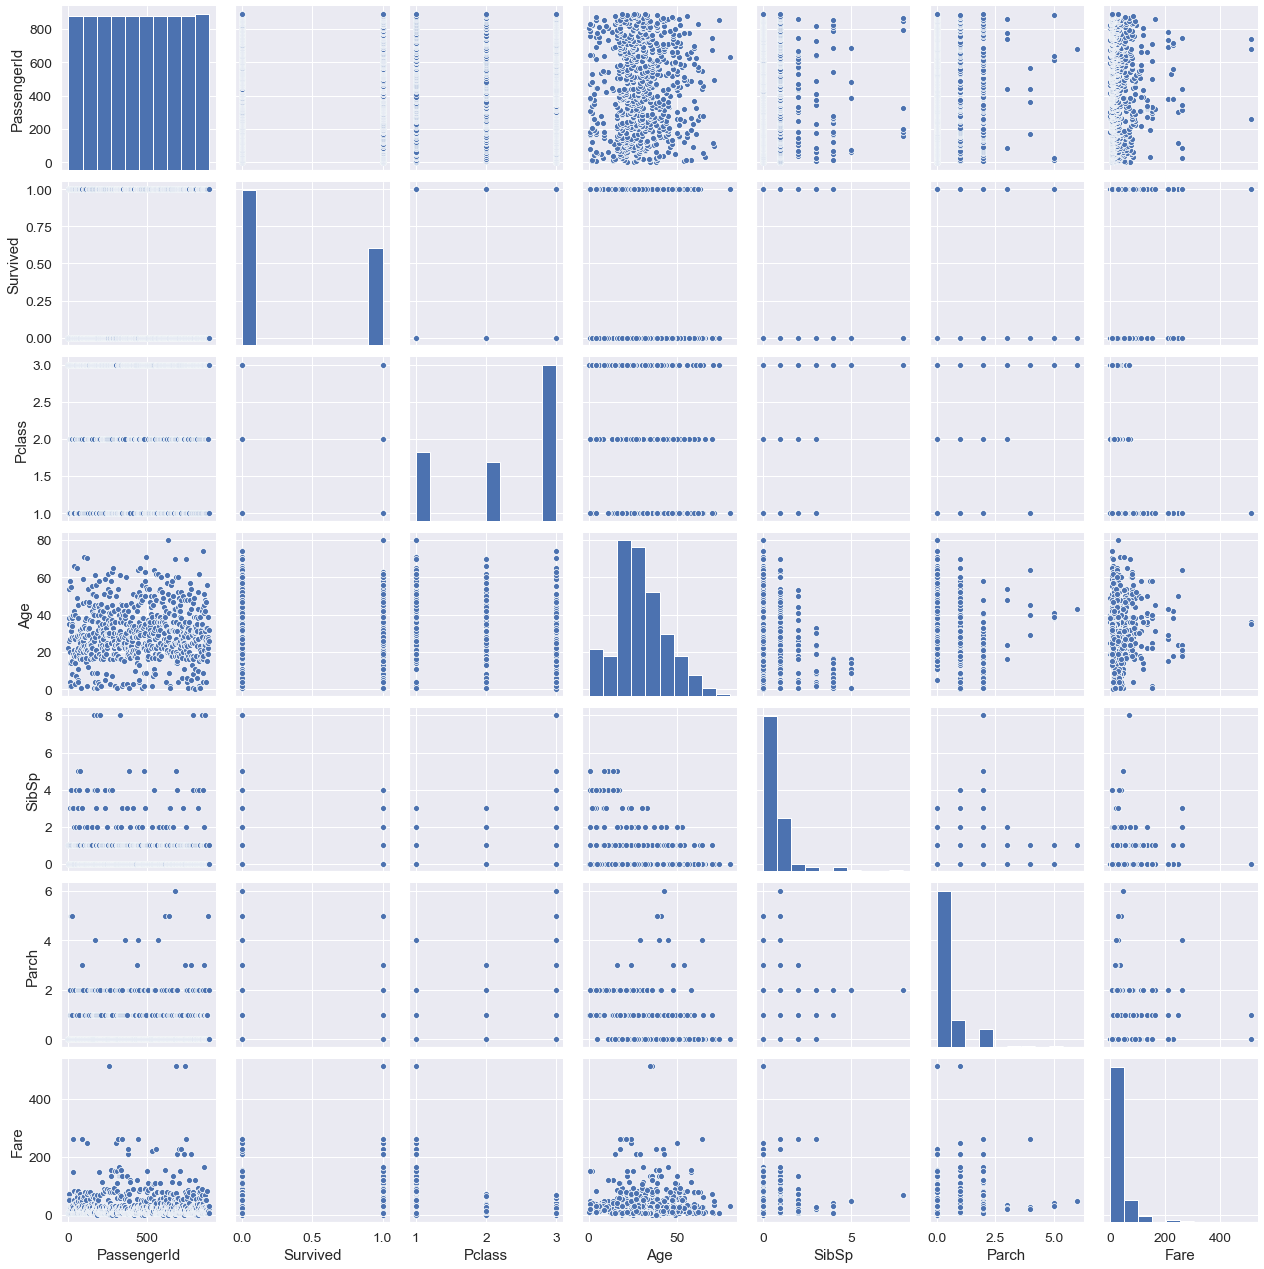

In [15]:
#Multivariate Analysis
sns.pairplot(df)
plt.show()

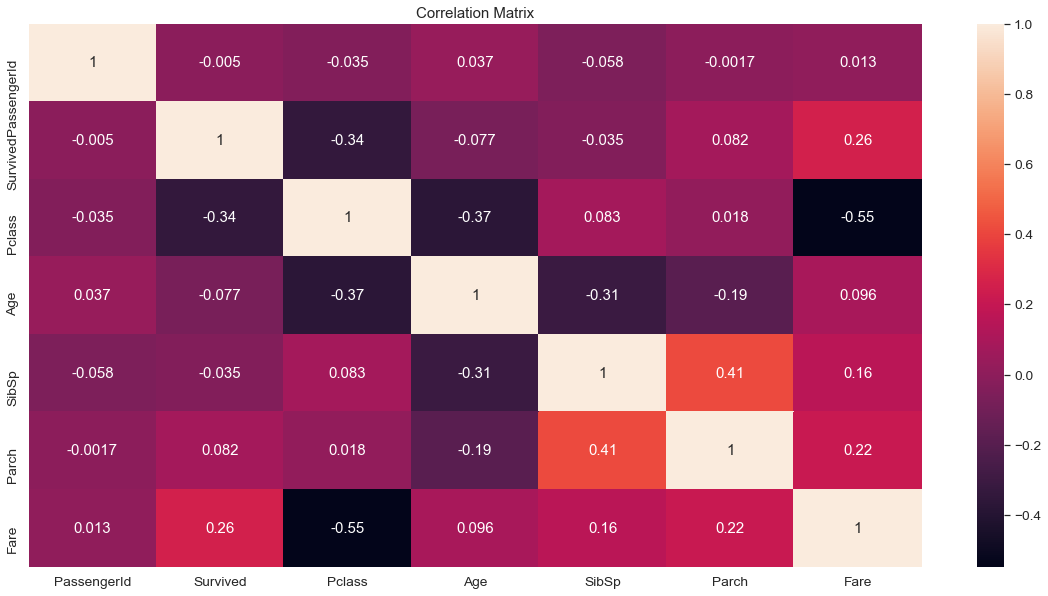

In [16]:
#finding the correlation between the variabbles
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.title("Correlation Matrix")
plt.show()

#### Fare have strong correlation with survival.So we can infer that people's survival is depends on the amount they paid for tickets.

In [17]:
#dropping Parch as it has lower correlation with Target variable
df.drop('Parch',axis=1,inplace=True)

#dropping Name and Ticket as it is not required for further analysis.
df.drop('Ticket',axis=1,inplace=True)

In [18]:
df.drop('Name',axis=1,inplace=True)

In [19]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,22.0,1,7.2500,S
1,2,1,1,female,38.0,1,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,1,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S
5,6,0,3,male,NaN,0,8.4583,Q
6,7,0,1,male,54.0,0,51.8625,S
7,8,0,3,male,2.0,3,21.0750,S
8,9,1,3,female,27.0,0,11.1333,S
9,10,1,2,female,14.0,1,30.0708,C


In [20]:
#The NaN values are replacing by SimpleImputer method
from sklearn.impute import SimpleImputer

In [21]:
imp=SimpleImputer(strategy='median')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [22]:
imp=SimpleImputer(strategy='most_frequent') # we used mode since the column is categorical
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [23]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,22.0,1,7.2500,S
1,2,1,1,female,38.0,1,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,1,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,13.0000,S
887,888,1,1,female,19.0,0,30.0000,S
888,889,0,3,female,28.0,1,23.4500,S
889,890,1,1,male,26.0,0,30.0000,C


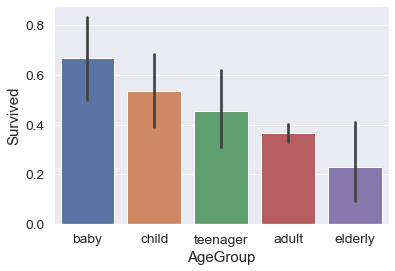

In [24]:
#sort the ages into logical categories
bins = [0, 3, 13, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(df.Age, bins, labels = labels)
df['AgeGroup'] = age_groups

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.show()


#### The probability of survival decreases with age

In [25]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,AgeGroup
0,1,0,3,male,22.0,1,7.2500,S,adult
1,2,1,1,female,38.0,1,71.2833,C,adult
2,3,1,3,female,26.0,0,7.9250,S,adult
3,4,1,1,female,35.0,1,53.1000,S,adult
4,5,0,3,male,35.0,0,8.0500,S,adult
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,13.0000,S,adult
887,888,1,1,female,19.0,0,30.0000,S,adult
888,889,0,3,female,28.0,1,23.4500,S,adult
889,890,1,1,male,26.0,0,30.0000,C,adult


In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64

All NaN values are replaced

## Changing categorical columns to numerical

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
labelencoder=LabelEncoder()
list=['Sex','Embarked','AgeGroup']
for i in list:
    df[i]=labelencoder.fit_transform(df[i])

In [29]:
#Seperating independent and target variable in X and Y
x=df.drop('Survived',axis=1)
y=df['Survived']

## Data distribution among all columns

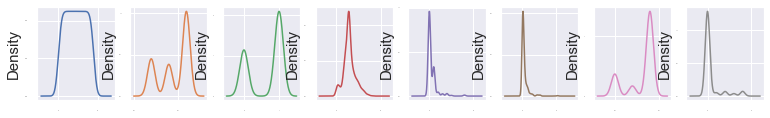

In [30]:
x.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()


In [31]:
x.skew()

PassengerId    0.000000
Pclass        -0.630548
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Fare           4.787317
Embarked      -1.264823
AgeGroup       2.642254
dtype: float64

#### We can see the skewness in the columns Pclass,SibSp,Fare.

In [32]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [33]:
df_new.skew()

PassengerId   -0.283201
Pclass        -0.441438
Sex           -0.618921
Age            0.074644
SibSp          0.808608
Fare          -0.040329
Embarked      -1.064527
AgeGroup       1.947644
dtype: float64

Sex,Embarked,Agegruop columns are categorical columns.so we removed the skewness of all other columns.

In [34]:
x=df_new

In [35]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,AgeGroup
0,-2.148141,0.863973,0.737695,-0.523388,1.373636,-0.878820,0.610411,-0.422551
1,-2.131830,-1.459129,-1.355574,0.685109,1.373636,1.336651,-1.780520,-0.422551
2,-2.117043,0.863973,-1.355574,-0.208093,-0.679850,-0.790065,0.610411,-0.422551
3,-2.103295,-1.459129,-1.355574,0.468033,1.373636,1.067352,0.610411,-0.422551
4,-2.090322,0.863973,0.737695,0.468033,-0.679850,-0.774439,0.610411,-0.422551
...,...,...,...,...,...,...,...,...
886,1.544720,-0.592604,0.737695,-0.130855,-0.679850,-0.294907,0.610411,-0.422551
887,1.547720,-1.459129,-1.355574,-0.767474,-0.679850,0.527906,0.610411,-0.422551
888,1.550719,0.863973,-1.355574,-0.054196,1.373636,0.288885,0.610411,-0.422551
889,1.553717,-1.459129,0.737695,-0.208093,-0.679850,0.527906,-1.780520,-0.422551


# Checking Outliers

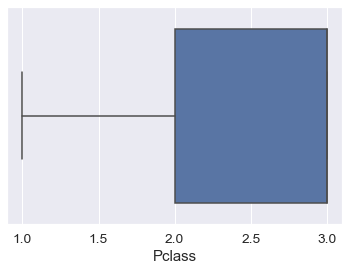

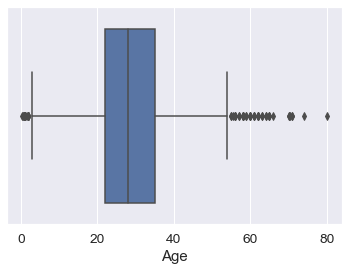

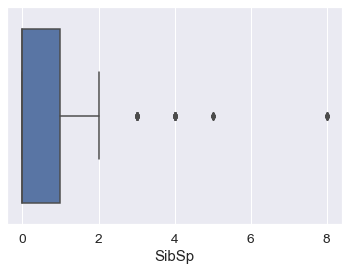

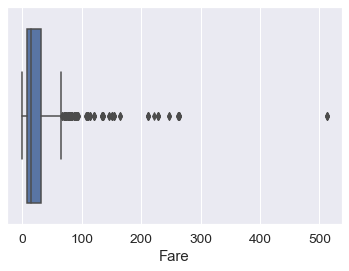

In [36]:
for i in ['Pclass','Age','SibSp','Fare']:
       
    
    sns.boxplot(df[i])
    plt.show()

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

array([[2.14814111, 0.86397329, 0.73769513, ..., 0.87882001, 0.61041095,
        0.42255121],
       [2.13183003, 1.45912855, 1.35557354, ..., 1.33665056, 1.78052001,
        0.42255121],
       [2.117043  , 0.86397329, 1.35557354, ..., 0.79006485, 0.61041095,
        0.42255121],
       ...,
       [1.55071925, 0.86397329, 1.35557354, ..., 0.28888536, 0.61041095,
        0.42255121],
       [1.55371741, 1.45912855, 0.73769513, ..., 0.52790578, 1.78052001,
        0.42255121],
       [1.5567146 , 0.86397329, 0.73769513, ..., 0.81234947, 1.23633916,
        0.42255121]])

In [38]:
threshold=3
print(np.where(z>3))

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 630, 633, 674, 732,
       806, 815, 822, 851], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3], dtype=int64))


In [39]:
df_new=df[(z<3).all(axis=1)]

In [40]:
df=df_new

In [41]:
df.shape

(874, 9)

## Scaling the data using Min-Max Scaler

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
mms=MinMaxScaler()

In [44]:
x=mms.fit_transform(x)

In [45]:
x

array([[0.        , 1.        , 1.        , ..., 0.4081704 , 1.        ,
        0.        ],
       [0.00440262, 0.        , 0.        , ..., 0.74873584, 0.        ,
        0.        ],
       [0.00839388, 1.        , 0.        , ..., 0.42181398, 1.        ,
        0.        ],
       ...,
       [0.99838176, 1.        , 0.        , ..., 0.58767181, 1.        ,
        0.        ],
       [0.99919101, 0.        , 1.        , ..., 0.62441439, 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.41838835, 0.22760207,
        0.        ]])

## Best random state

In [46]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.8470149253731343 on Random_state 145


## Create train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=145)

In [48]:
model=[LogisticRegression(),SVC(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8470149253731343
[[143  22]
 [ 19  84]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       165
           1       0.79      0.82      0.80       103

    accuracy                           0.85       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



Accuracy score of SVC() is:
0.8507462686567164
[[150  15]
 [ 25  78]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       165
           1       0.84      0.76      0.80       103

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268



Accuracy score of RandomForestClassifier() is:
0.8097014925373134
[[140  25]
 [ 26  77]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85

# Cross Validation

In [49]:
model=[LogisticRegression(),SVC(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score',scr)
    print('Cross validation score',scr.mean())
    print('Standard deviation',scr.std())
    print('\n')

Cross validation score of LogisticRegression() is:
Score [0.77653631 0.81460674 0.79213483 0.76404494 0.80898876]
Cross validation score 0.7912623187496077
Standard deviation 0.019066153078295452


Cross validation score of SVC() is:
Score [0.81564246 0.80898876 0.82022472 0.79213483 0.83707865]
Cross validation score 0.8148138848785388
Standard deviation 0.014655749712576915


Cross validation score of RandomForestClassifier() is:
Score [0.70391061 0.78651685 0.84269663 0.81460674 0.84269663]
Cross validation score 0.7980854936915448
Standard deviation 0.05148980432775928


Cross validation score of GradientBoostingClassifier() is:
Score [0.61452514 0.78089888 0.83707865 0.79213483 0.84269663]
Cross validation score 0.7734668256857699
Standard deviation 0.08307276265561035




#### The difference between the accuracy and cross validation score is minimum in RandomForestClassifier().So this is our best model.

## Hyperparameter Tuning

In [50]:
# Creating parameter list to pass in GridSearchCV

parameters={'criterion':['gini','entropy'],'max_depth':[1,10],'max_features':['auto','sqrt','log2']}

In [51]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [52]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [53]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}

In [54]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [55]:
accuracy_score(y_test,GCV_pred)

0.8208955223880597

In [56]:
#Saving Model
import pickle
filename="Titanicsurvival.pkl"
pickle.dump(GCV,open(filename,'wb'))

## Conclusion

In [57]:
loaded_model=pickle.load(open('Titanicsurvival.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8208955223880597


In [58]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_com=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))

In [59]:
df_com

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
263,0,0
264,1,0
265,1,1
266,1,0
